# Summarize DEG and DAR result

In [1]:
import pandas as pd
import os
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.chdir("/tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/regional_dar_deg/")
plot_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/analysis/final_figures/")

## DEG counts

In [3]:
sub_dirs = [xx.stem for xx in list(Path("deg/").iterdir())]
n_subclass = len(sub_dirs)
n_region = 9
region_align = ["A24", "A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG", "V1C"]
subclass_order = [
    "L2_3_IT", "L4_IT", "L5_IT", "L6_IT", "L5_6_NP", "L5_ET", "L6_CT", "L6B", "L6_IT_Car3",
    "SNCG", "SST", "SST_CHODL", "LAMP5", "LAMP5_LHX6", "VIP", "PAX6", "PVALB", "Chandelier",
    "Oligo", "Astro", "Micro", "OPC", "Endo", "VLMC"
]
subclass_order = [xx for xx in subclass_order if xx in sub_dirs]

In [4]:
overall_counts = pd.DataFrame({
    "count": [0] * (n_subclass * n_region),
    "region": [xx for _ in range(n_subclass) for xx in region_align],
    "subclass": [xx for xx in subclass_order for _ in range(n_region)]
})
unique_counts = pd.DataFrame({
    "count": [0] * (n_subclass * n_region),
    "region": [xx for _ in range(n_subclass) for xx in region_align],
    "subclass": [xx for xx in subclass_order for _ in range(n_region)]
})
for subclass in sub_dirs:
    regional_degs = dict()
    subdir = Path("deg/{}".format(subclass))
    for file in subdir.glob("*_result.tsv"):
        region = file.stem.split("_")[0]
        region_df = pd.read_csv(file, sep="\t", header=0, index_col=0)
        regional_degs[region] = region_df[(region_df["logFC"] > 0) & (region_df["FDR"] < 0.001)].index.to_list()
        cond = (overall_counts["region"] == region) & (overall_counts["subclass"] == subclass)
        overall_counts.loc[cond, "count"] = len(regional_degs[region])
    for key1 in regional_degs.keys():
        tmpset1 = set(regional_degs[key1])
        for key2 in regional_degs.keys():
            if key1 == key2:
                continue
            tmpset2 = set(regional_degs[key2])
            tmpset1 = tmpset1 - tmpset2
        cond = (overall_counts["region"] == key1) & (overall_counts["subclass"] == subclass)
        unique_counts.loc[cond, "count"] = len(tmpset1)

In [5]:
overall_counts.to_csv("all_degs_counts.tsv", header=True, index=False, sep="\t")
unique_counts.to_csv("unique_degs_counts.tsv", header=True, index=False, sep="\t")

In [6]:
region_colors = {
    "A24": "#83E9A4",
    "A9": "#D24924",
    "FI": "#D666BD",
    "M1C": "#E49474",
    "S1C": "#8787EA",
    "MTG": "#449E3E",
    "A1C": "#D4C591",
    "AnG": "#7DD2EB",
    "V1C": "#008ADA"
}

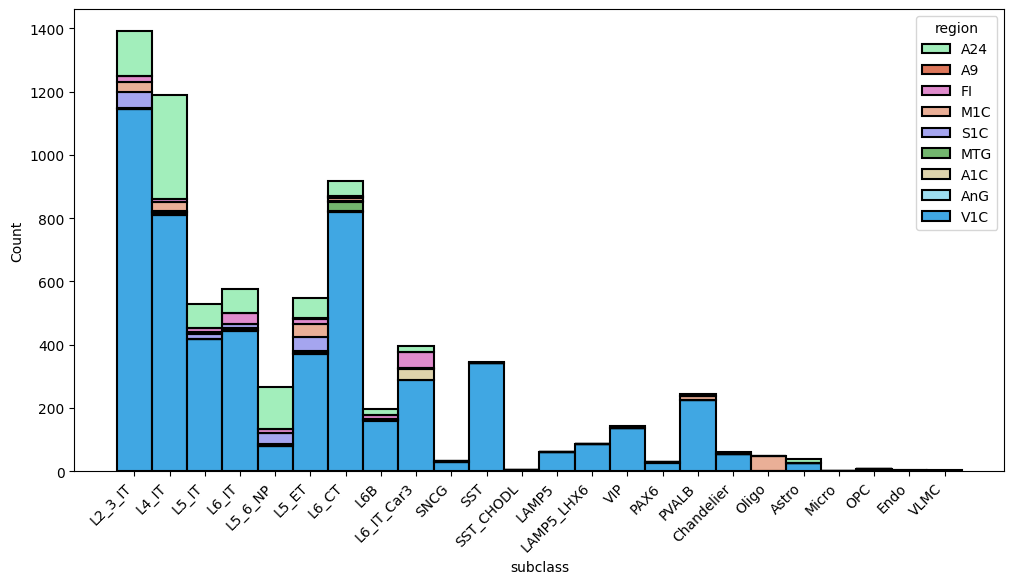

In [7]:
unique_counts["subclass"] = pd.Categorical(unique_counts["subclass"], categories=subclass_order)
unique_counts["region"] = pd.Categorical(unique_counts["region"], categories=region_align)
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(12)
fig.set_figheight(6)
sns.histplot(
    unique_counts, 
    x="subclass", 
    hue="region", 
    multiple="stack", 
    weights="count",
    linewidth=1.5,
    ax=ax,
    palette=region_colors
)
ax.tick_params(axis="x", rotation=45)
for label in ax.get_xticklabels():
    label.set_horizontalalignment("right")
fig.savefig(plot_dir / "subclass_regional_deg_counts.pdf", format="pdf", dpi=300)

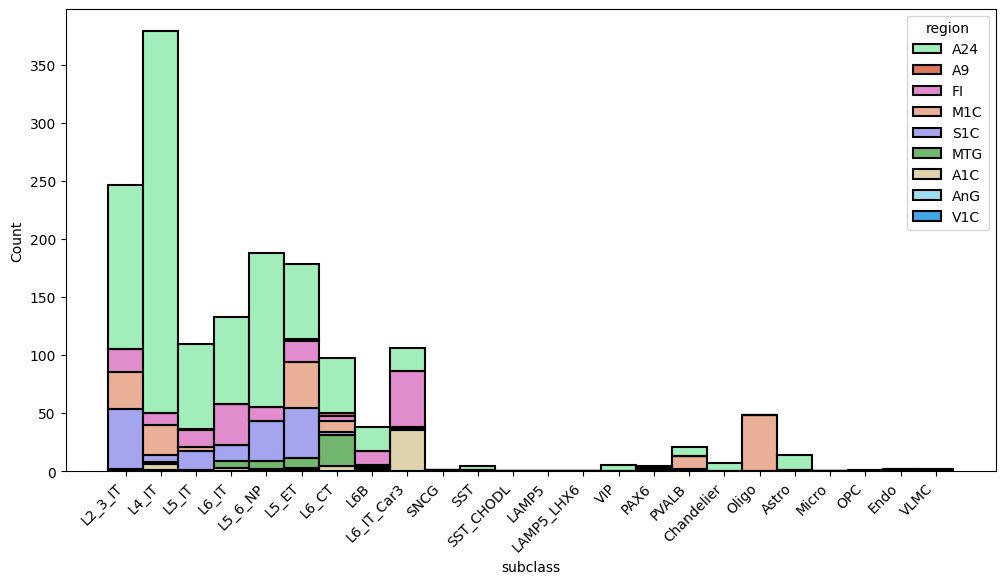

In [8]:
unique_counts_no_v1c = unique_counts[unique_counts["region"] != "V1C"]
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(12)
fig.set_figheight(6)
sns.histplot(
    unique_counts_no_v1c, 
    x="subclass", 
    hue="region", 
    multiple="stack", 
    weights="count",
    linewidth=1.5,
    ax=ax,
    palette=region_colors
)
ax.tick_params(axis="x", rotation=45)
for label in ax.get_xticklabels():
    label.set_horizontalalignment("right")
fig.savefig(plot_dir / "subclass_regional_deg_counts_no_v1c.pdf", format="pdf", dpi=300)

In [9]:
overall_counts = pd.DataFrame({
    "count": [0] * (n_subclass * n_region),
    "region": [xx for _ in range(n_subclass) for xx in region_align],
    "subclass": [xx for xx in subclass_order for _ in range(n_region)]
})
unique_counts = pd.DataFrame({
    "count": [0] * (n_subclass * n_region),
    "region": [xx for _ in range(n_subclass) for xx in region_align],
    "subclass": [xx for xx in subclass_order for _ in range(n_region)]
})
for subclass in sub_dirs:
    regional_degs = dict()
    subdir = Path("dar/{}".format(subclass))
    for file in subdir.glob("*_result.tsv"):
        region = file.stem.split("_")[0]
        region_df = pd.read_csv(file, sep="\t", header=0, index_col=0)
        regional_degs[region] = region_df[(region_df["logFC"] > 0) & (region_df["FDR"] < 0.01)].index.to_list()
        cond = (overall_counts["region"] == region) & (overall_counts["subclass"] == subclass)
        overall_counts.loc[cond, "count"] = len(regional_degs[region])
    for key1 in regional_degs.keys():
        tmpset1 = set(regional_degs[key1])
        for key2 in regional_degs.keys():
            if key1 == key2:
                continue
            tmpset2 = set(regional_degs[key2])
            tmpset1 = tmpset1 - tmpset2
        cond = (overall_counts["region"] == key1) & (overall_counts["subclass"] == subclass)
        unique_counts.loc[cond, "count"] = len(tmpset1)

In [10]:
overall_counts.to_csv("all_dars_counts.tsv", header=True, index=False, sep="\t")
unique_counts.to_csv("unique_dars_counts.tsv", header=True, index=False, sep="\t")

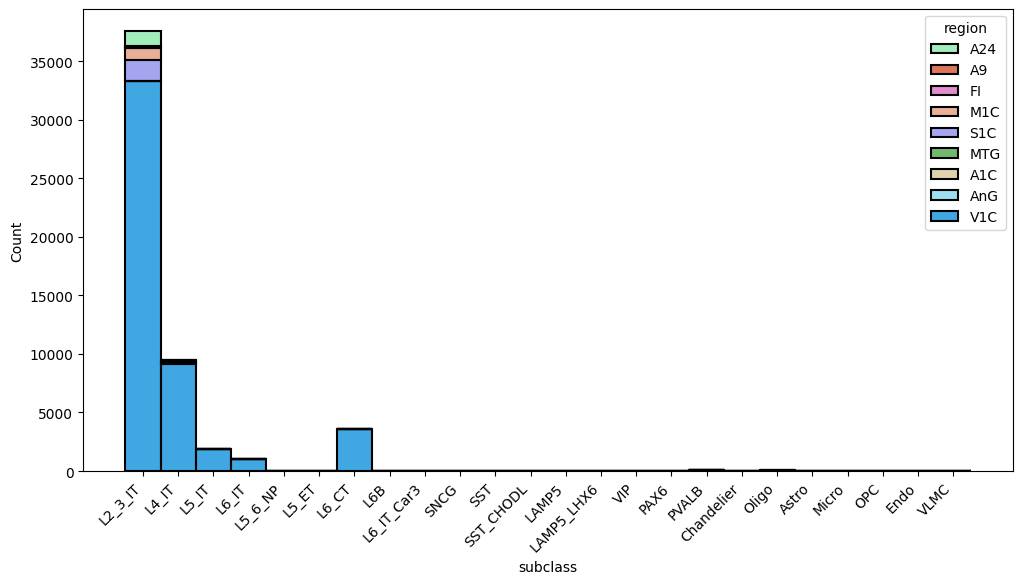

In [11]:
unique_counts["subclass"] = pd.Categorical(unique_counts["subclass"], categories=subclass_order)
unique_counts["region"] = pd.Categorical(unique_counts["region"], categories=region_align)
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(12)
fig.set_figheight(6)
sns.histplot(
    unique_counts, 
    x="subclass", 
    hue="region", 
    multiple="stack", 
    weights="count",
    linewidth=1.5,
    ax=ax,
    palette=region_colors
)
ax.tick_params(axis="x", rotation=45)
for label in ax.get_xticklabels():
    label.set_horizontalalignment("right")
fig.savefig(plot_dir / "subclass_regional_dar_counts.pdf", format="pdf", dpi=300)

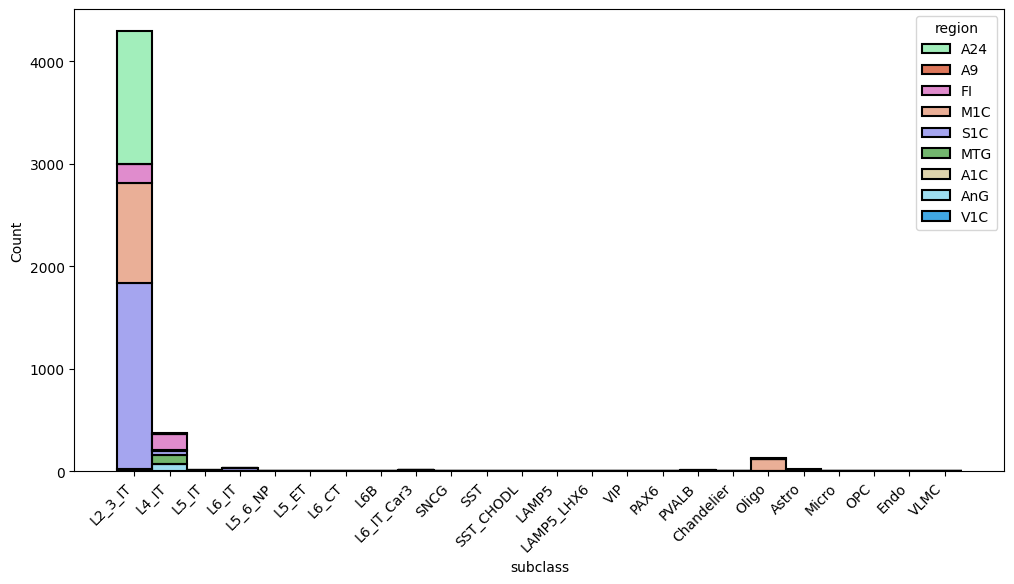

In [12]:
unique_counts_no_v1c = unique_counts[unique_counts["region"] != "V1C"]
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(12)
fig.set_figheight(6)
sns.histplot(
    unique_counts_no_v1c, 
    x="subclass", 
    hue="region", 
    multiple="stack", 
    weights="count",
    linewidth=1.5,
    ax=ax,
    palette=region_colors
)
ax.tick_params(axis="x", rotation=45)
for label in ax.get_xticklabels():
    label.set_horizontalalignment("right")
fig.savefig(plot_dir / "subclass_regional_dar_counts_no_v1c.pdf", format="pdf", dpi=300)

# Another analysis: compare calcium genes across subclasses in each region

In [1]:
import pandas as pd
import os
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import decoupler as dc

In [2]:
# set the root directory
root_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/scenicplus/")
os.chdir(root_dir / "other_celltypes")

In [3]:
calcium_genes_table = pd.read_csv(
    "../../share/genes_of_interest/calcium_genes.tsv", sep="\t", header=None)
calcium_genes = calcium_genes_table[0].tolist()

In [4]:
subclass_order = [
    "L2_3_IT", "L4_IT", "L5_IT", "L6_IT", "L5_6_NP", "L6_CT", "L6B", "L6_IT_Car3", "L5_ET",
    "PVALB", "SST", "SST_CHODL", "Chandelier", "PAX6", "VIP", "SNCG", "LAMP5", "LAMP5_LHX6",
    "Oligo", "Astro", "Micro", "OPC", "Endo", "VLMC"
]
region_align = ["A24", "A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG", "V1C"]

In [5]:
region_plot_series = dict()
for region in region_align:
    region_plot_series[region] = dict()

In [6]:
rna_mat_files = Path("./").glob("*rna_matrix.h5ad")
for rna_file in rna_mat_files:
    subclass = rna_file.stem.split("_rna_")[0]
    rna_counts = sc.read_h5ad(rna_file)
    if subclass in ["L4_IT","SST_CHODL", "L5_ET"]:
        rna_counts = rna_counts.raw.to_adata()

    rna_region_counts = dc.get_pseudobulk(
        adata=rna_counts,
        sample_col="Region",
        groups_col=None,
        min_cells=0,
        min_counts=0,
        min_prop=0.0,
        min_smpls=0,
        remove_empty=True,
        mode="sum"
    )
    sc.pp.normalize_total(rna_region_counts, target_sum=1e6)
    sc.pp.log1p(rna_region_counts, base=2)

    for region in region_align:
        region_plot_series[region][subclass] = rna_region_counts[region, calcium_genes].X.flatten().copy()

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.

In [9]:
region_plot_data = dict()
for region in region_align:
    region_plot_data[region] = pd.DataFrame(region_plot_series[region])

In [15]:
figure_dir = "/tscc/projects/ps-epigen/users/biy022/biccn/analysis/final_figures/new_summary_20250430/"

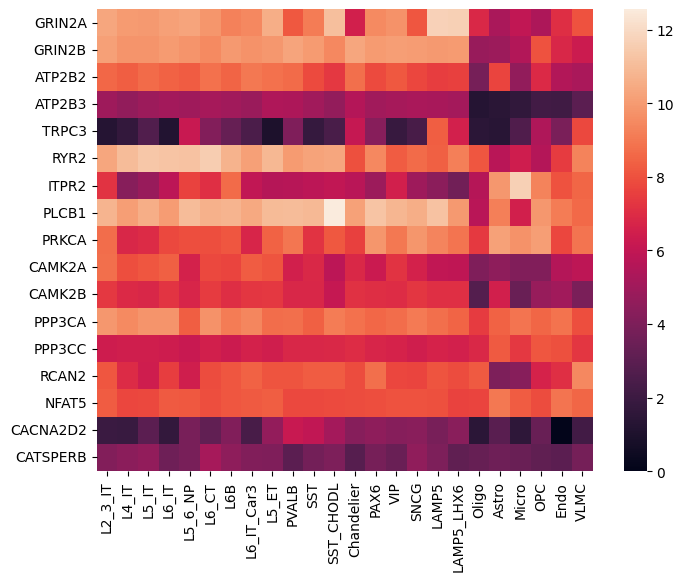

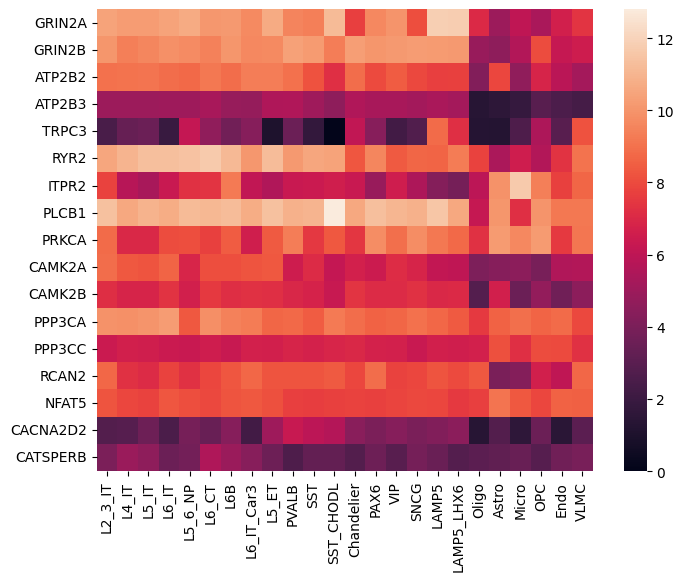

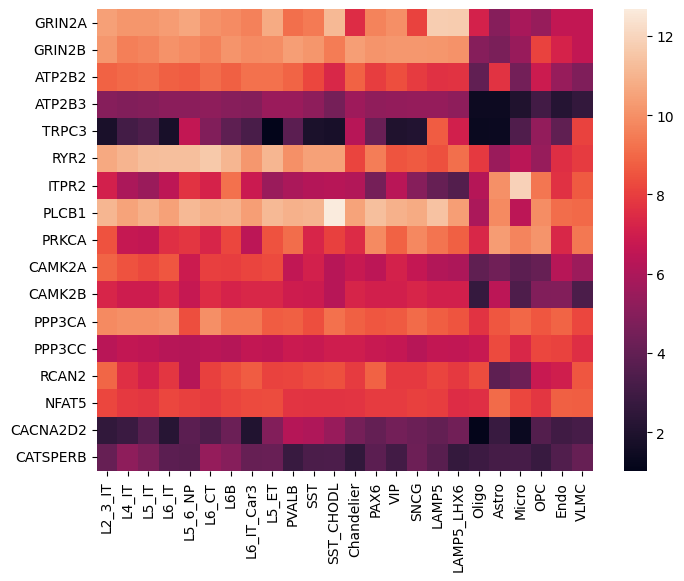

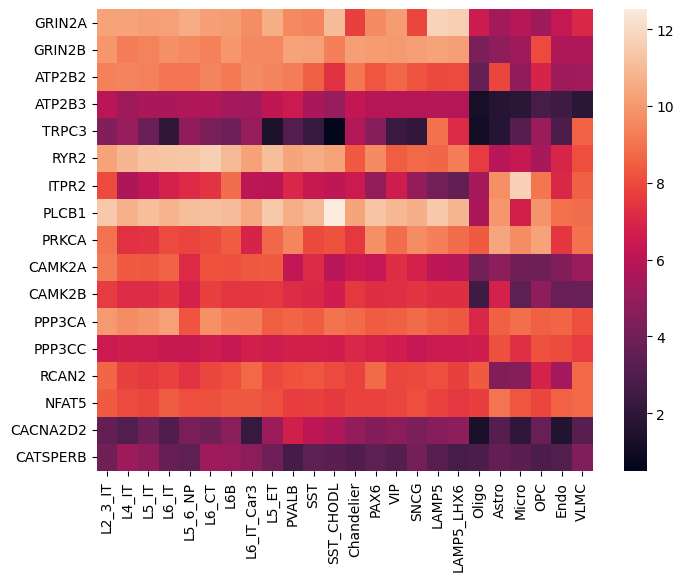

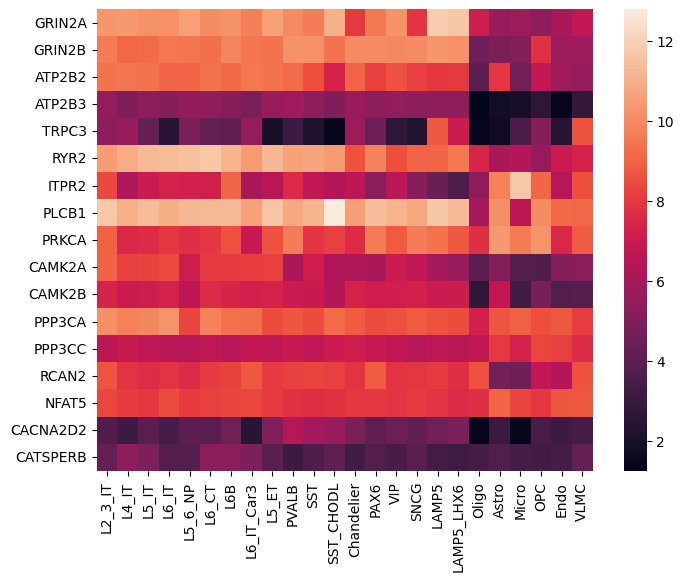

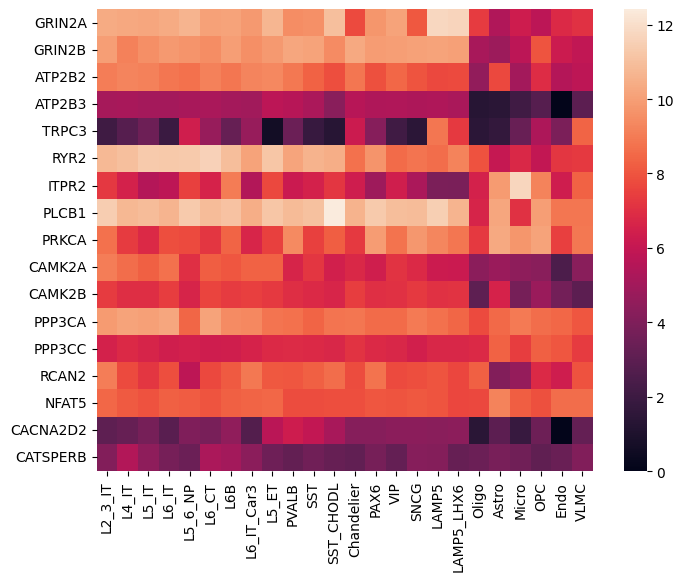

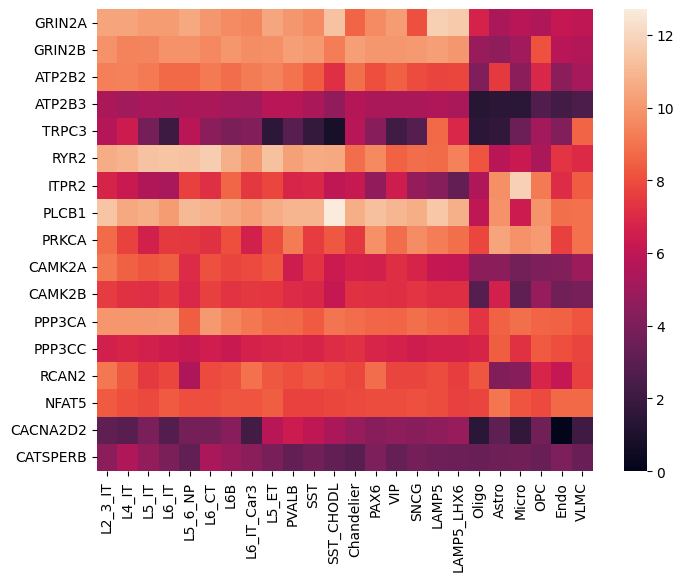

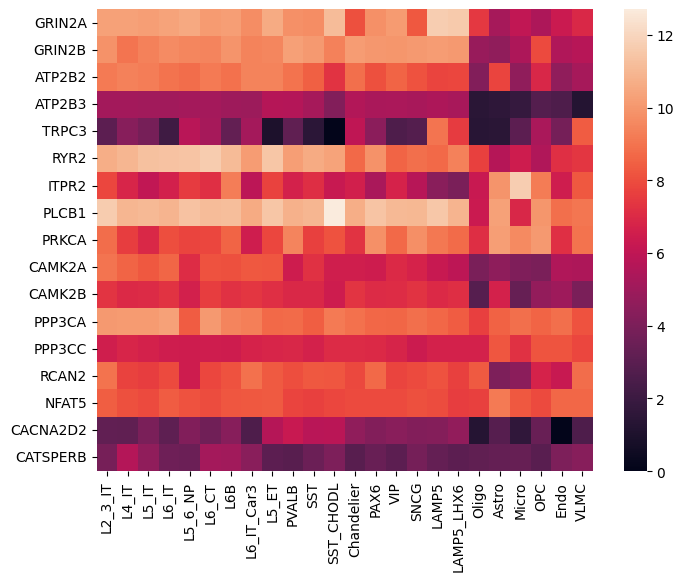

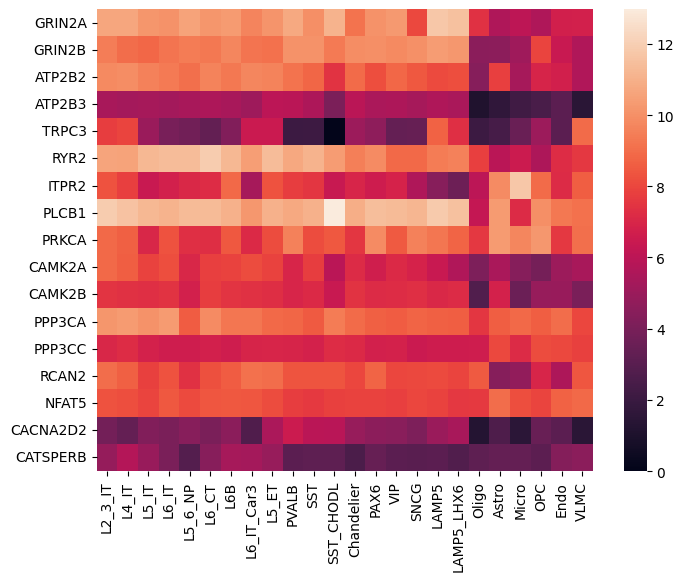

In [16]:
for region in region_align:
    plot_data = region_plot_data[region][subclass_order]
    fig, ax = plt.subplots(1, 1)
    fig.set_figwidth(8)
    fig.set_figheight(6)
    sns.heatmap(
        plot_data,
        xticklabels=subclass_order,
        yticklabels=calcium_genes,
        ax=ax
    )
    fig.savefig(Path(figure_dir) / "{}.pdf".format(region), dpi=300, format="pdf")